(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
[0 1]


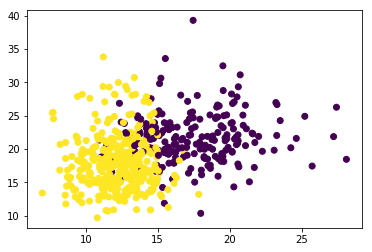

the accuracy under kernel linear is 0.929825
the accuracy under kernel poly is 0.923977
the accuracy under kernel sigmoid is 0.596491
the accuracy under kernel rbf is 0.596491


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data=load_breast_cancer()
X=data.data
y=data.target
print(X.shape)
print(X[0:3])#前三人
print(np.unique(y))#二分类

plt.scatter(X[:,0],X[:,1],c=y) #散点图，第0维，第1位
plt.show()

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)
kernals=["linear","poly","sigmoid","rbf"]
for k in kernals:
    clf=SVC(kernel=k,gamma="auto",degree=1,cache_size=5000).fit(Xtrain,Ytrain)
    print("the accuracy under kernel %s is %f" %(k,clf.score(Xtest,Ytest)))
    

In [3]:
#查看数据，寻找rbf效果较差的原因
import pandas as pd
data=pd.DataFrame(X)
data.describe().T

#标准化/归一化数据
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
data=pd.DataFrame(X)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [4]:
#使用各个核函数分类
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)
kernals=["linear","poly","sigmoid","rbf"]
for k in kernals:
    clf=SVC(kernel=k,gamma="auto",degree=1,cache_size=5000).fit(Xtrain,Ytrain)
    print("the accuracy under kernel %s is %f" %(k,clf.score(Xtest,Ytest)))

the accuracy under kernel linear is 0.976608
the accuracy under kernel poly is 0.964912
the accuracy under kernel sigmoid is 0.953216
the accuracy under kernel rbf is 0.970760


0.9766081871345029 0.012067926406393264


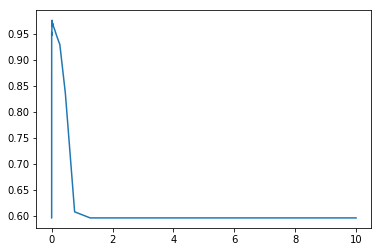

In [12]:
#参数调整：rbf核函数下的gamma
score=[]
gamma_range=np.logspace(-10,1,50)#返回10的-10次幂和

for i in gamma_range:
    clf=SVC(kernel="rbf",gamma=i,degree=1,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [13]:
#参数调整：poly核函数下的gamma和coef0
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV#网格搜索
gamma_range=np.logspace(-10,1,20)
coef0_range=np.linspace(0,5,10)
param_grid=dict(gamma=gamma_range,coef0=coef0_range)
cv=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=420)
grid=GridSearchCV(SVC(kernel="poly",degree=1,cache_size=5000)
               ,param_grid=param_grid,cv=cv)
grid.fit(X,y)
print("best para are %s with a score of 0.5%f"
     % (grid.best_params_,grid.best_score_))

best para are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.50.969591


0.9766081871345029 1.2340816326530613


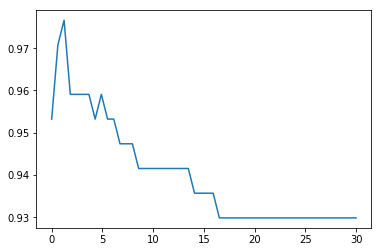

In [14]:
#调整线性核函数的C参数
score=[]
C_range=np.linspace(0.01,30,50)
for i in C_range:
    clf=SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.7424489795918365


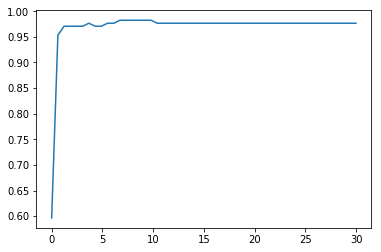

In [15]:
#调整rbf核函数的C参数
score=[]
C_range=np.linspace(0.01,30,50)
for i in C_range:
    clf=SVC(kernel="rbf",C=i,gamma=0.012,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()